# H1 ПР1
## Гладышкевич Игорь, ММР214

#### Информация о датасете
**Ссылка:** https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

**Описание:** According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

**Список переменных**:
* 1) id: unique identifier
* 2) gender: "Male", "Female" or "Other"
* 3) age: age of the patient
* 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* 6) ever_married: "No" or "Yes"
* 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* 8) Residence_type: "Rural" or "Urban"
* 9) avg_glucose_level: average glucose level in blood
* 10) bmi: body mass index
* 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* 12) stroke: 1 if the patient had a stroke or 0 if not
* Note: "Unknown" in smoking_status means that the information is unavailable for this patient

**Для начала загрузим библиотеку Пандас, она нам точно понадобится. Остальное будем загружать по ходу работы. Загрузим датасет и посмотрим на него**

In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/gladyshkevich_joom/Downloads/ПР1/healthcare-dataset-stroke-data.csv')
print(df.shape)
df.head()

(5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Итак, у нас датасет с 12 переменными 5110 наблюдениями. Из инфо видно, что в переменной BMI есть пропуски. Это нужно учитывать при дальнейшем анализе. Кроме того, из описания мы знаем, что по переменной smoking_status есть наблюдения со значением Unknown, которые для определенного анализа (регрессий, корреляций) не будут подходить.**

**Датасет описывает некоторые характеристики определенного человека (пол, гендер, тип работы, курение и т.д.) и информацию о произошедшем инсульте. Он хорошо подходит для изучения зависимостей между этими характеристиками и вероятностью инсульта. Однако, на данном этапе мы просто посмотрим на данные с помощью изученных в курсе методов. Начнем с просмотра анкеты человека (1 наблюдения) и фильтрации: попробуем отфильтровать наблюдения с \ без инсульта**

In [4]:
df.iloc[345] ## случайное наблюдение

id                           9487
gender                     Female
age                          23.0
hypertension                    0
heart_disease                   0
ever_married                   No
work_type                 Private
Residence_type              Urban
avg_glucose_level           99.92
bmi                          25.8
smoking_status       never smoked
stroke                          0
Name: 345, dtype: object

Видим женщину, 23 лет, информацию о ней (нет сопутствующих заболеваний, ИМТ (BMI) 25.8, не курила, инсульта не было и т.д.

In [5]:
df[df['stroke'] == 1].shape ## был инсульт

(249, 12)

In [6]:
df[df['stroke'] == 0].shape ## не было инсульта

(4861, 12)

**Получили, что у 249 наблюдений был инсульт, а у 4861 - нет.**

**Теперь давайте посмотрим на уникальные значения, они же категории, по некоторым категорийным переменным. Пол и семейное положение включать не будем, так как там и так все понятно**

In [7]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [8]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [9]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

**Видим категории, по ним же посмотрим на первые распределения.**

In [10]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [11]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [194]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [12]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

**Понимание количества наблюдений по каждой категории поможет нам далее при анализе этих переменных**

**Теперь давайте с помощью сортировки посмотрим на максимальные и минимальные значения переменных типа float. Также сделаем это более "красивым путем" - через функции**

In [13]:
df['age'].sort_values()

3295     0.08
1614     0.08
3618     0.16
4021     0.16
3968     0.16
        ...  
4590    82.00
4094    82.00
2341    82.00
4716    82.00
187     82.00
Name: age, Length: 5110, dtype: float64

In [14]:
df['avg_glucose_level'].sort_values()

4886     55.12
1191     55.22
4110     55.23
682      55.25
772      55.26
         ...  
2462    266.59
4983    267.60
3088    267.61
1207    267.76
193     271.74
Name: avg_glucose_level, Length: 5110, dtype: float64

In [15]:
df['bmi'].sort_values()

1609    10.3
3307    11.3
2187    11.5
657     12.0
922     12.3
        ... 
5039     NaN
5048     NaN
5093     NaN
5099     NaN
5105     NaN
Name: bmi, Length: 5110, dtype: float64

**Интересное наблюдение получилось по возрасту - значения подобные 0,08 обозначают детей до года, 0.08 = 1 месяц. Видим, что возраст у нас колеблется от 1 месяца до 82 лет. Уровень глюкозы - от 55.12 до 271.74. По BMI вывод сделать не можем из-за пропусков. Поэтому, используем функции.**

In [16]:
bmi_max = df['bmi'].max()
bmi_min = df['bmi'].min()
print('Максимальный BMI=',bmi_max)
print('Минимальный BMI=',bmi_min)

Максимальный BMI= 97.6
Минимальный BMI= 10.3


**Теперь создадим еще одну переменную по BMI. Индекс массы тела можно сгруппировать от дефицита до ожирения на 7 групп. Пороги возьмем из открытых источников. Если по BMI у нас пропуск - в новую переменную поставим нет данных.**

In [17]:
def get_bmi_cat(bmi): ##задаем функцию
    if bmi <= 16:
        return 'Выраженный дефицит'
    elif (bmi >16) and (bmi <= 18.5):
        return 'Дефицит'
    elif (bmi >18.5) and (bmi <= 25):
        return 'Норма'
    elif (bmi >25) and (bmi <= 30):
        return 'Предожирение'
    elif (bmi >30) and (bmi <= 35):
        return 'Ожирение 1 степени'
    elif (bmi >35) and (bmi <= 40):
        return 'Ожирение 2 степени'
    elif (bmi >40):
        return 'Ожирение 3 степени'
    else:
        return 'Нет данных'
df['bmi_cat'] = df['bmi'].apply(get_bmi_cat) ##делаем новую переменную и запускаем функцию


**Посмотрим на распределение новой переменной**

In [18]:
df['bmi_cat'].value_counts()

Предожирение          1409
Норма                 1258
Ожирение 1 степени     985
Ожирение 2 степени     500
Ожирение 3 степени     408
Дефицит                257
Нет данных             201
Выраженный дефицит      92
Name: bmi_cat, dtype: int64

**Сделаем то же самое для возраста**

In [19]:
def get_age_cat(age): ##задаем функцию
    if age <= 7:
        return '7 и младше'
    elif (age >7) and (age <= 18):
        return '7-18'
    elif (age >18) and (age <= 25):
        return '19-25'
    elif (age >25) and (age <= 35):
        return '26-35'
    elif (age >35) and (age <= 45):
        return '36-45'
    elif (age >45) and (age <= 55):
        return '46-55'
    elif (age >55) and (age <= 65):
        return '56-65'
    elif (age >65) and (age <= 75):
        return '66-75'
    elif (age >75):
        return '76 и старше'
    else:
        return 'Нет данных'
df['age_group'] = df['age'].apply(get_age_cat) ##делаем новую переменную и запускаем функцию
df['age_group'].value_counts() ##смотрим на распределение

46-55          796
56-65          731
36-45          719
26-35          606
7-18           540
66-75          500
76 и старше    465
19-25          377
7 и младше     376
Name: age_group, dtype: int64

**Группы получились довольно наполненные, что хорошо для дальнейшего (например) построения классификаций и т.д. Давайте построим группировку по двум новым переменным.**

In [20]:
pd.set_option('display.max_rows', None) ##сбрасываем максимальное число строк, чтобы увидеть всю таблицу
df.groupby('age_group')['bmi_cat'].value_counts()


age_group    bmi_cat           
19-25        Норма                 149
             Предожирение          113
             Ожирение 1 степени     45
             Ожирение 2 степени     36
             Ожирение 3 степени     19
             Нет данных              8
             Дефицит                 7
26-35        Предожирение          184
             Норма                 164
             Ожирение 1 степени    102
             Ожирение 3 степени     67
             Ожирение 2 степени     64
             Нет данных             21
             Дефицит                 3
             Выраженный дефицит      1
36-45        Предожирение          199
             Ожирение 1 степени    161
             Норма                 142
             Ожирение 2 степени     99
             Ожирение 3 степени     92
             Нет данных             21
             Дефицит                 4
             Выраженный дефицит      1
46-55        Предожирение          249
             Ожирение 1 степени 

In [21]:
df.groupby('age_group')['bmi_cat'].value_counts().unstack() #более удобный вид в таблице

bmi_cat,Выраженный дефицит,Дефицит,Нет данных,Норма,Ожирение 1 степени,Ожирение 2 степени,Ожирение 3 степени,Предожирение
age_group,,,,,,,,
19-25,NaN,7.0,8.0,149.0,45.0,36.0,19.0,113.0
26-35,1.0,3.0,21.0,164.0,102.0,64.0,67.0,184.0
36-45,1.0,4.0,21.0,142.0,161.0,99.0,92.0,199.0
46-55,1.0,3.0,25.0,129.0,189.0,102.0,98.0,249.0
56-65,1.0,4.0,33.0,96.0,192.0,107.0,72.0,226.0
66-75,2.0,3.0,38.0,62.0,125.0,56.0,30.0,184.0
7 и младше,56.0,141.0,11.0,156.0,6.0,NaN,NaN,6.0
7-18,29.0,85.0,10.0,249.0,44.0,13.0,20.0,90.0
76 и старше,1.0,7.0,34.0,111.0,121.0,23.0,10.0,158.0


In [22]:
df.groupby('age_group')['bmi_cat'].agg(pd.Series.mode) #найдем моду в каждой категории

age_group
19-25                 Норма
26-35          Предожирение
36-45          Предожирение
46-55          Предожирение
56-65          Предожирение
66-75          Предожирение
7 и младше            Норма
7-18                  Норма
76 и старше    Предожирение
Name: bmi_cat, dtype: object

**Получили, что в нашем датасете наиболее часто по возрастным группам встречаются люди с предожирением. Однако, в 3 самых младших группах чаще встречаются люди с нормальным ИМТ. Давайте здесь же попробуем построить первые простые графики**

<AxesSubplot:xlabel='age_group'>

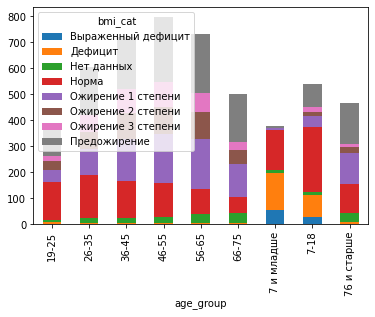

In [23]:
df.groupby('age_group')['bmi_cat'].value_counts().unstack().plot(kind='bar',stacked=True)

**Теперь построим простые графики для других переменных**

<AxesSubplot:>

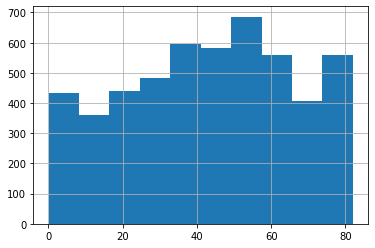

In [24]:
df['age'].hist(bins=10)

<AxesSubplot:>

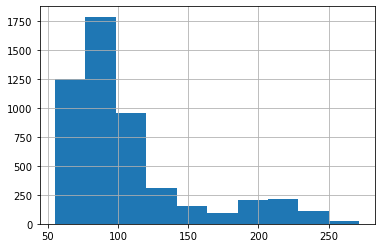

In [25]:
df['avg_glucose_level'].hist(bins=10)

<AxesSubplot:>

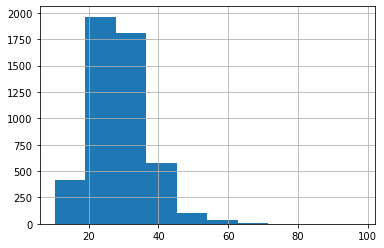

In [26]:
df['bmi'].hist(bins=10)

<AxesSubplot:>

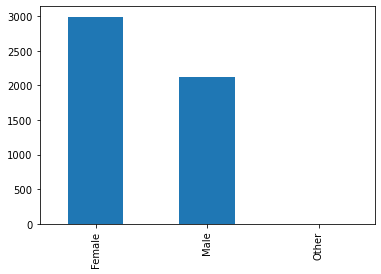

In [27]:
df['gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

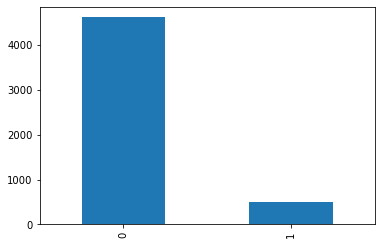

In [28]:
df['hypertension'].value_counts().plot(kind='bar')

<AxesSubplot:>

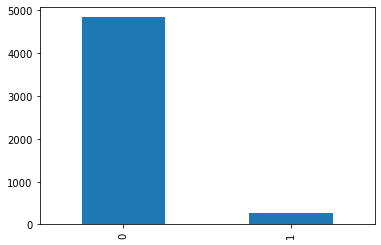

In [29]:
df['heart_disease'].value_counts().plot(kind='bar')

<AxesSubplot:>

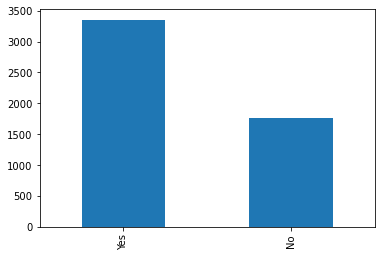

In [30]:
df['ever_married'].value_counts().plot(kind='bar')

<AxesSubplot:>

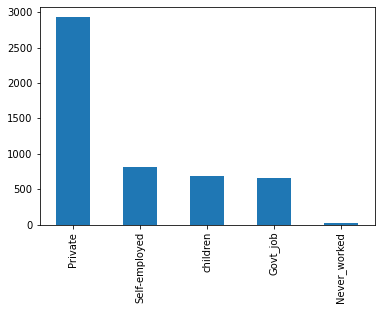

In [31]:
df['work_type'].value_counts().plot(kind='bar')

<AxesSubplot:>

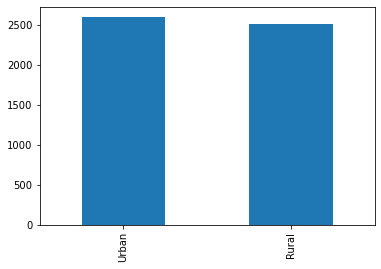

In [32]:
df['Residence_type'].value_counts().plot(kind='bar')

<AxesSubplot:>

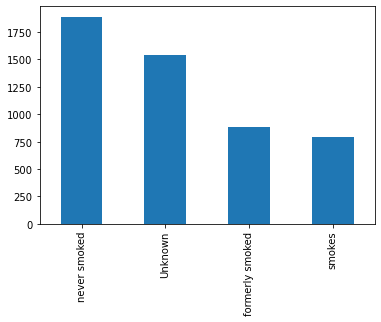

In [33]:
df['smoking_status'].value_counts().plot(kind='bar')

**Теперь давайте посчитаем некоторые меры центральной тенденции. Это базовые измерения, которые используются во многих дальнейших статистических методах, поиске выбросов и т.д.**

**Начнем с номинальных переменных. Для них мы можем посчитать только моду. В принципе, мы можем это сделать просто посмотрев на графики выше. Но для этого также можно использовать следующую команду**

In [34]:
df['smoking_status'].mode()

0    never smoked
Name: smoking_status, dtype: object

**Получили, что по статусу курения наиболее часто встречается некурящие. Еще удобно получать быстрый обзор отсортированных категорий для поиска моды через следующую команду. Это очень помогло в рамках онлайн курса**


In [35]:
from collections import Counter #импортируем счетчик
counter = Counter(df['smoking_status'])
counter.most_common()

[('never smoked', 1892),
 ('Unknown', 1544),
 ('formerly smoked', 885),
 ('smokes', 789)]

**Ранговых переменных у нас нет. Меры разброса для бинарных переменных строить кажется бессмысленно, поэтому построим меры разброса для наших интервальных переменных. Кроме того, что это можно сделать отдельными командами, можно попробовать вынести все сразу**

In [36]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [37]:
df['age'].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [38]:
df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

**В этих таблицах представлены следующие показатели переменных: количество, среднее, стандартное отклонение, минимум, 1-3 квартили, максимум**

**Кроме того, к этим показателям можем обращаться с помощью других команд, в том числе из библиотеке numpy. Импортируем ее.**

In [39]:
import numpy as np
print('Среднее=', df['avg_glucose_level'].mean())
print('Медиана=',df['avg_glucose_level'].median())
print('Макс=',df['avg_glucose_level'].max())
print('Мин=',df['avg_glucose_level'].min())
print('Стандартное отклонение=',df['avg_glucose_level'].std())
print('1 квартиль',np.percentile(df['avg_glucose_level'], 25))
print('3 квартиль',np.percentile(df['avg_glucose_level'], 75))

Среднее= 106.14767710371804
Медиана= 91.88499999999999
Макс= 271.74
Мин= 55.12
Стандартное отклонение= 45.28356015058203
1 квартиль 77.245
3 квартиль 114.09


**На этом этапе мы уже можем строить и проверять какие-то простые гипотезы. Например, давайте проверим гипотезу, что средний ИМТ больше у более возрастных групп. Пока мы проверим ее без учета статистической значимости** 

In [40]:
df.groupby('age_group')['bmi'].agg(['mean'])

,mean
age_group,
19-25,27.718428
26-35,30.022564
36-45,31.505158
46-55,31.667445
56-65,31.428940
66-75,30.353247
7 и младше,18.701644
7-18,23.789057
76 и старше,28.409513


**Видим, что средний ИМТ растет до группы 26-35, дальше средние значения примерно одинаковые, а в самой возрастной группе он становится ниже. Пока мы не можем делать значимые выводы так как не проверена статистическая значимость**

**Теперь попробуем проверить гипотезу о том, что средний уровень глюкозы у людей с ожирением выше, чем у людей без ожирения**

In [41]:
df.groupby('bmi_cat')['avg_glucose_level'].agg(['mean'])

,mean
bmi_cat,
Выраженный дефицит,97.551304
Дефицит,92.097510
Нет данных,126.724627
Норма,96.650294
Ожирение 1 степени,110.261726
Ожирение 2 степени,115.502900
Ожирение 3 степени,122.362402
Предожирение,103.924784


**Данные говорят об обоснованности гипотезы**

**Также на курсе мы проходили Z оценку для стандартизации переменных. Для данного датасета это не применимо, так как у нас нет разных шкал, обозначающих одно и то же. Но давайте ради практики сделаем Z оценку для переменной уровня глюкозы**

In [42]:
import scipy.stats ##импортируем нужную для быстрого расчета библиотеку
scipy.stats.zscore(df['avg_glucose_level']) ## сначала просто посмотрим на результат

0       2.706375
1       2.121559
2      -0.005028
3       1.437358
4       1.501184
5       1.768195
6      -0.796342
7      -0.259671
8      -0.662506
9      -1.050764
10     -0.567981
11      0.316091
12     -0.036168
13      2.510921
14      2.383931
15      1.352993
16      1.887455
17      2.542945
18     -0.373852
19      2.449966
20      1.938914
21      2.807968
22      2.706596
23      2.256058
24     -0.072388
25     -0.044782
26     -0.114129
27      1.848364
28      1.967404
29      2.332914
30      2.339540
31     -0.502167
32      2.004728
33      3.237084
34     -0.484720
35     -0.488474
36      2.508271
37     -0.696075
38     -0.298762
39     -0.999085
40     -0.620985
41     -0.771386
42      0.855854
43     -0.336748
44      2.360521
45      3.035225
46      0.080221
47      0.024566
48     -0.150570
49     -1.061365
50     -0.357509
51     -0.680836
52      0.466933
53      0.397144
54      2.018421
55      2.000090
56     -1.034200
57      2.906468
58      1.9621

In [43]:
df['z-score_glucose']=scipy.stats.zscore(df['avg_glucose_level']) ##добавим новую переменную в датасет

<AxesSubplot:>

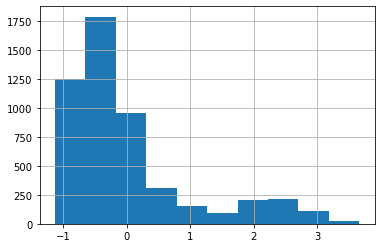

In [44]:
df['z-score_glucose'].hist()

<AxesSubplot:>

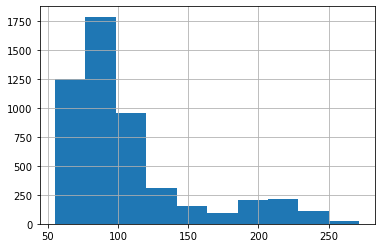

In [45]:
df['avg_glucose_level'].hist()

**Видим, что распределение у нас одинаковое, но Z оценка показывает нам нормализованные значения.**

**Теперь поработаем с выбросами. Проверим выбросы для каждой интервальной переменной, будем использовать разные методы. Начем с межквартильного размаха. Проверим выбросы по ИМТ и построим график**

<AxesSubplot:>

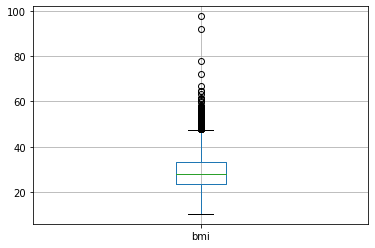

In [46]:
df.boxplot(column=['bmi'])  

**Видим, что выбросов в большие значения много. Говорит нам о большом количестве людей с очень высоким ИМТ**

In [47]:
q1 = df['bmi'].quantile(0.25) ##считаем квартили
q3 = df['bmi'].quantile(0.75)
iqr = q3 - q1 ##считаем межквартильный размах
iqr_outlier_threshold_bottom = q1 - 1.5 * iqr ##определяем нижнюю и верхнюю границу
iqr_outlier_threshold_up = q3 + 1.5 * iqr
print('Нижний порог = ', iqr_outlier_threshold_bottom)
print('Верхний порог = ',iqr_outlier_threshold_up)
x = df[df['bmi'] > iqr_outlier_threshold_up].shape
print('Количество наблюдений-выбросов в большую сторону = ', x)
y = df[df['bmi'] < iqr_outlier_threshold_bottom].shape
print('Количество наблюдений-выбросов в меньшую сторону = ', y)

Нижний порог =  9.099999999999998
Верхний порог =  47.5
Количество наблюдений-выбросов в большую сторону =  (110, 15)
Количество наблюдений-выбросов в меньшую сторону =  (0, 15)


**Получили, что у нас есть 110 выбросов в большую сторону. То есть у 110 человек ИМТ>47.5. Назовем это сверхвысоким ИМТ для нашего датасета.** 
**Давайте посмотрим, как выбросы распределяются по наличию инсульта**

In [48]:
df[df['bmi'] > iqr_outlier_threshold_up]['stroke'].value_counts()

0    108
1      2
Name: stroke, dtype: int64

**Всего два человека с сверхвысоким ИМТ имели инсульт. В целом, это уже дает нам некоторое основание предполагать, что сверхвысокий ИМТ - это еще не показатель наличия инстульта**

**Теперь воспользуемся среднеквадратичными отклонениями. Будем считать выбросами значения, которые отклоняются более чем на 2.5 отклонения от среднего. Сделаем это для уровня глюкозы. Также построим график в начале. Он работает на основе межквартильного размаха, однако по нему все равно можно понять о каких выбросах в целом мы будем говорить**

<AxesSubplot:>

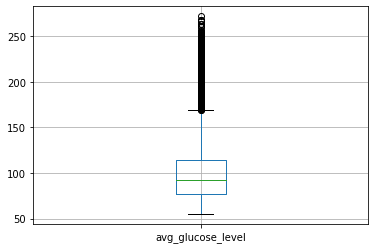

In [49]:
df.boxplot(column=['avg_glucose_level'])  

**Видно, что здесь у нас тоже много выбросов в большую сторону. То есть есть пласт людей с "нормальным" уровнем глюкозы, а есть те, у кого он превышает значительно превышает средние значения, то есть выбросы**

In [50]:
mean = df['avg_glucose_level'].mean() 
std = df['avg_glucose_level'].std()
std_outlier_threshold_bottom = mean - 2.5 * std ##определяем нижнюю и верхнюю границу
std_outlier_threshold_up = mean + 2.5 * std
print('Нижний порог = ', std_outlier_threshold_bottom)
print('Верхний порог = ',std_outlier_threshold_up)
a = df[df['avg_glucose_level'] > std_outlier_threshold_up].shape
print('Количество наблюдений-выбросов в большую сторону = ', a)
b = df[df['avg_glucose_level'] < std_outlier_threshold_bottom].shape
print('Количество наблюдений-выбросов в меньшую сторону = ', b)

Нижний порог =  -7.0612232727370525
Верхний порог =  219.35657748017314
Количество наблюдений-выбросов в большую сторону =  (221, 15)
Количество наблюдений-выбросов в меньшую сторону =  (0, 15)


**Получили 221 выброс в большую сторону. В меньшую сторону при данном сетапе выбросов нет, так как нижний порог отрицательный, чего не может быть в реальности. Попробуем посмотреть, какие возрастные группы у людей с выбросами и наличие у них инсульта**

In [51]:
df[df['avg_glucose_level'] > std_outlier_threshold_up]['stroke'].value_counts()

0    189
1     32
Name: stroke, dtype: int64

In [52]:
df[df['avg_glucose_level'] > std_outlier_threshold_up]['age_group'].value_counts()

66-75          62
56-65          54
76 и старше    45
46-55          36
36-45          13
26-35           8
7-18            2
19-25           1
Name: age_group, dtype: int64

**Видим, что с ростом возраcта количество людей со сверхвысоким уровнем глюкозы (выбросы) растет. Но это абсолютные значения, в дальнейших этапах при тестировании гипотез проверим, будет ли эта разница статистически значимой.**

**Теперь ради интереса сравним эти два способа определить выбросы на примере переменной возраста**

<AxesSubplot:>

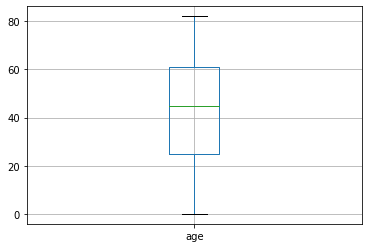

In [53]:
df.boxplot(column=['age'])  

In [54]:
q1 = df['age'].quantile(0.25) ##считаем квартили
q3 = df['age'].quantile(0.75)
iqr = q3 - q1 ##считаем межквартильный размах
iqr_outlier_threshold_bottom = q1 - 1.5 * iqr ##определяем нижнюю и верхнюю границу
iqr_outlier_threshold_up = q3 + 1.5 * iqr
print('Нижний порог = ', iqr_outlier_threshold_bottom)
print('Верхний порог = ',iqr_outlier_threshold_up)
x = df[df['age'] > iqr_outlier_threshold_up].shape
print('Количество наблюдений-выбросов в большую сторону = ', x)
y = df[df['age'] < iqr_outlier_threshold_bottom].shape
print('Количество наблюдений-выбросов в меньшую сторону = ', y)

Нижний порог =  -29.0
Верхний порог =  115.0
Количество наблюдений-выбросов в большую сторону =  (0, 15)
Количество наблюдений-выбросов в меньшую сторону =  (0, 15)


In [55]:
mean = df['age'].mean() 
std = df['age'].std()
std_outlier_threshold_bottom = mean - 2.5 * std ##определяем нижнюю и верхнюю границу
std_outlier_threshold_up = mean + 2.5 * std
print('Нижний порог = ', std_outlier_threshold_bottom)
print('Верхний порог = ',std_outlier_threshold_up)
a = df[df['age'] > std_outlier_threshold_up].shape
print('Количество наблюдений-выбросов в большую сторону = ', a)
b = df[df['age'] < std_outlier_threshold_bottom].shape
print('Количество наблюдений-выбросов в меньшую сторону = ', b)

Нижний порог =  -13.30500232637479
Верхний порог =  99.75823128919282
Количество наблюдений-выбросов в большую сторону =  (0, 15)
Количество наблюдений-выбросов в меньшую сторону =  (0, 15)


**Выбросов нет. Попробуем еще раз по переменной ИМТ**

In [56]:
q1 = df['bmi'].quantile(0.25) ##считаем квартили
q3 = df['bmi'].quantile(0.75)
iqr = q3 - q1 ##считаем межквартильный размах
iqr_outlier_threshold_bottom = q1 - 1.5 * iqr ##определяем нижнюю и верхнюю границу
iqr_outlier_threshold_up = q3 + 1.5 * iqr
print('Нижний порог = ', iqr_outlier_threshold_bottom)
print('Верхний порог = ',iqr_outlier_threshold_up)
x = df[df['bmi'] > iqr_outlier_threshold_up].shape
print('Количество наблюдений-выбросов в большую сторону = ', x)
y = df[df['bmi'] < iqr_outlier_threshold_bottom].shape
print('Количество наблюдений-выбросов в меньшую сторону = ', y)

Нижний порог =  9.099999999999998
Верхний порог =  47.5
Количество наблюдений-выбросов в большую сторону =  (110, 15)
Количество наблюдений-выбросов в меньшую сторону =  (0, 15)


In [57]:
mean = df['bmi'].mean() 
std = df['bmi'].std()
std_outlier_threshold_bottom = mean - 2.5 * std ##определяем нижнюю и верхнюю границу
std_outlier_threshold_up = mean + 2.5 * std
print('Нижний порог = ', std_outlier_threshold_bottom)
print('Верхний порог = ',std_outlier_threshold_up)
a = df[df['bmi'] > std_outlier_threshold_up].shape
print('Количество наблюдений-выбросов в большую сторону = ', a)
b = df[df['bmi'] < std_outlier_threshold_bottom].shape
print('Количество наблюдений-выбросов в меньшую сторону = ', b)

Нижний порог =  9.25807008759428
Верхний порог =  48.52840373599507
Количество наблюдений-выбросов в большую сторону =  (96, 15)
Количество наблюдений-выбросов в меньшую сторону =  (0, 15)


**Видим, что через отклонения границы смещены в большую сторону. Из-за этого выбросов в большую сторону меньше. Покажем наблюдения, которые добавляются в выбросы при переходе к использованию межквартильного размаха.**

In [58]:
new_outliers = df[df['bmi'] < std_outlier_threshold_up]
new_outliers = new_outliers[new_outliers['bmi'] > iqr_outlier_threshold_up]
new_outliers

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,age_group,z-score_glucose
341,38805,Female,37.0,0,0,Yes,Private,Rural,75.18,48.2,formerly smoked,0,Ожирение 3 степени,36-45,-0.683928
622,39601,Female,33.0,0,0,Yes,Private,Urban,69.40,47.8,never smoked,0,Ожирение 3 степени,26-35,-0.811581
1239,27145,Female,26.0,0,0,No,Private,Rural,89.30,48.4,smokes,0,Ожирение 3 степени,26-35,-0.372085
1575,49495,Female,18.0,0,0,No,Private,Rural,168.15,48.5,never smoked,0,Ожирение 3 степени,7-18,1.369336
2277,37150,Female,34.0,0,0,Yes,Private,Rural,83.53,48.5,formerly smoked,0,Ожирение 3 степени,26-35,-0.499517
2883,4793,Female,60.0,1,0,Yes,Self-employed,Urban,99.23,48.0,formerly smoked,0,Ожирение 3 степени,56-65,-0.152778
3024,69834,Female,57.0,0,0,Yes,Govt_job,Rural,87.10,48.3,smokes,0,Ожирение 3 степени,56-65,-0.420672
3305,21989,Female,25.0,0,0,No,Private,Urban,76.44,48.3,Unknown,0,Ожирение 3 степени,19-25,-0.656101
3959,37608,Female,38.0,0,0,No,Private,Urban,218.60,47.9,formerly smoked,0,Ожирение 3 степени,36-45,2.483535
4405,68853,Female,70.0,0,0,Yes,Private,Rural,149.80,47.6,Unknown,0,Ожирение 3 степени,66-75,0.964072


**Интересно, что все пограничные выбросы - женщины. Построим группировку выбросов по межквартильному размаху по полу, чтобы посмотреть все выбросы**

In [59]:
df[df['bmi'] > iqr_outlier_threshold_up]['gender'].value_counts()

Female    85
Male      25
Name: gender, dtype: int64

In [60]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

**Интересно, что в разрезе выбросов по BMI гораздо больше женщин, чем во всей выборке. Скорее всего здесь есть корреляция. Будем проверять это в следующих разделах. Но, пойдем по порядку, и сначала поработаем с пропущенными значениями. В этом датасете у нас пропущенные значения есть по переменной ИМТ. Посмотрим сколько их.**

In [61]:
df[df['bmi'].isna()].shape

(201, 15)

**Кроме того, посмотрим сколько у нас пропусков по переменной курения, так как статус Unknown по своей сути является пропущенным значением, так как оно не несет никакой информации**

In [62]:
df[df['smoking_status'] == 'Unknown'].shape ## был инсульт

(1544, 15)

**Итак, единственной стратегией, с которой мы можем работать по курению - удалить все наблюдения с пропущенным значением. Однако, их доля слишком велика, поэтому мы потеряем очень много информации по другим переменным, если это сделаем. Поэтому на этом этапе оставим их, но будем учитывать в дальнейшем анализе.**

**По поводу ИМТ - здесь мы можем заполнить пропуски медианой, средним или случайными значениями в пределах определенного интервала. Однако, на мой взгляд это может сдвинуть наши данные и испортить нам дальнейших анализ, так как разбег данных по этой переменной достаточно широкий, и это может повлиять на статистические значимости в корреляциях, регрессиях и т.д. На мой взгляд, лучшим подходом в данном случае будет просто удалить их, так как это всего 4% от общего массива данных. Давайте проверим их распределение по другим группам, ведь в случае если эти данные собранны в каком-то одном разрезе, мы потеряем весь разрез целиком.**

In [63]:
df1=df[df['bmi'].isna()]

In [64]:
df1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,age_group,z-score_glucose
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Нет данных,56-65,2.121559
8,27419,Female,59.00,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1,Нет данных,56-65,-0.662506
13,8213,Male,78.00,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1,Нет данных,76 и старше,2.510921
19,25226,Male,57.00,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1,Нет данных,56-65,2.449966
27,61843,Male,58.00,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1,Нет данных,56-65,1.848364
29,69160,Male,59.00,0,0,Yes,Private,Rural,211.78,NaN,formerly smoked,1,Нет данных,56-65,2.332914
43,1845,Female,63.00,0,0,Yes,Private,Urban,90.90,NaN,formerly smoked,1,Нет данных,56-65,-0.336748
46,37937,Female,75.00,0,1,No,Self-employed,Urban,109.78,NaN,Unknown,1,Нет данных,66-75,0.080221
50,18587,Female,76.00,0,0,No,Private,Urban,89.96,NaN,Unknown,1,Нет данных,76 и старше,-0.357509
51,15102,Male,78.00,1,0,Yes,Private,Urban,75.32,NaN,formerly smoked,1,Нет данных,76 и старше,-0.680836


In [65]:
df1['age_group'].value_counts()

66-75          38
76 и старше    34
56-65          33
46-55          25
36-45          21
26-35          21
7 и младше     11
7-18           10
19-25           8
Name: age_group, dtype: int64

In [66]:
df1['smoking_status'].value_counts()

Unknown            61
smokes             52
formerly smoked    48
never smoked       40
Name: smoking_status, dtype: int64

In [67]:
df1['stroke'].value_counts()

0    161
1     40
Name: stroke, dtype: int64

**В разрезе инсульта при удалении наблюдений с пропущенными значениями по BMI мы потеряем 40 наблюдений с инсультом. Это 16% от всех наблюдений с инсультом, что слишком много. Поэтому, я предлагаю оставить на данный момент эти наблюдения и вернуться к этому вопросу при использовании методов, которые зависят от наличия пропусков**

**В данной ПР должны быть также рассмотрены методы визуализации данных. Характер данных не позволят нам построить большое количество графиков, например у нас нет данных подходящих под линейные графики с датами и т.д. Однако, попробуем визуализировать что-то поинтереснее, чем это было сделано ранее**

In [68]:
import matplotlib.pyplot as plt ## импортируем библиотеку для визуализации

Text(0.5, 0.98, 'Распределение статуса курения по наличию и отсутствию инсульта')

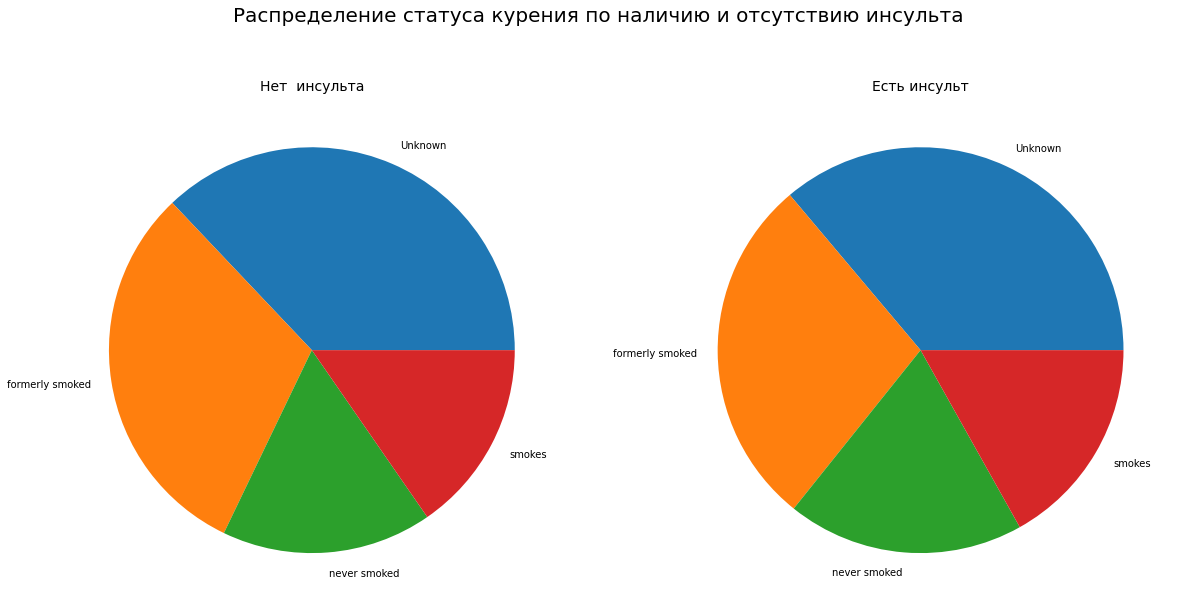

In [69]:
fig, ax = plt.subplots(1,2, figsize=(20,10)) #задаем форму
labels1=sorted(df['smoking_status'][df['stroke']==0].unique().tolist()) #получаем уникальные отсортированные лейблы
labels2=sorted(df['smoking_status'][df['stroke']==1].unique().tolist())
ax[0].pie(df.groupby('stroke')['smoking_status'].value_counts().loc[0], labels=labels1)
ax[1].pie(df.groupby('stroke')['smoking_status'].value_counts().loc[1], labels=labels2)
for axis,cat in zip(ax.ravel(), ['Нет  инсульта', 'Есть инсульт']): #делаем подназвания
    axis.set_title(cat, fontsize=14)

fig.suptitle('Распределение статуса курения по наличию и отсутствию инсульта', fontsize=20)

Text(0.5, 0.98, 'Распределение возрастных групп по наличию и отсутствию инсульта')

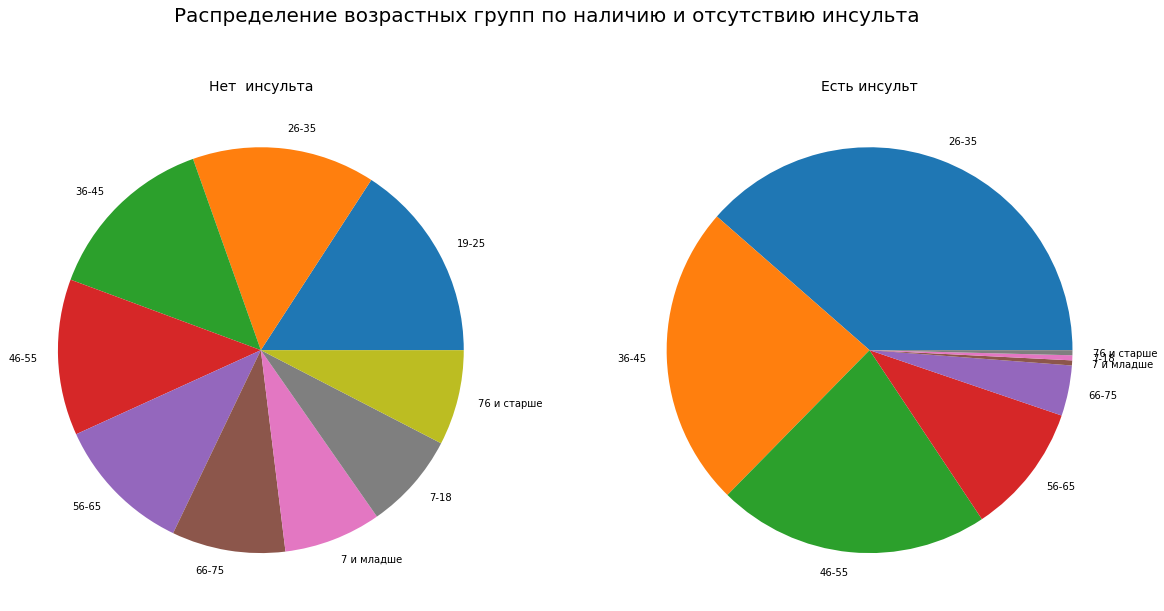

In [70]:
fig, ax = plt.subplots(1,2, figsize=(20,10)) #задаем форму
labels1=sorted(df['age_group'][df['stroke']==0].unique().tolist()) #получаем уникальные отсортированные лейблы
labels2=sorted(df['age_group'][df['stroke']==1].unique().tolist())
ax[0].pie(df.groupby('stroke')['age_group'].value_counts().loc[0], labels=labels1)
ax[1].pie(df.groupby('stroke')['age_group'].value_counts().loc[1], labels=labels2)
for axis,cat in zip(ax.ravel(), ['Нет  инсульта', 'Есть инсульт']): #делаем подназвания
    axis.set_title(cat, fontsize=14)

fig.suptitle('Распределение возрастных групп по наличию и отсутствию инсульта', fontsize=20)

**Уже сейчас видно, что распределение по курению в группах инсульта практически одинаковое. Скорее всего, мы не найдем каких-то значимых связей между этими переменными. А вот с возрастом другая история - здесь совсем разные доли.**

**Теперь воспользуемся другой библиотекой - seaborn, и построим еще несколько графиков**

Text(0.5, 0.98, 'Распределение типов работ в группах инсульта')

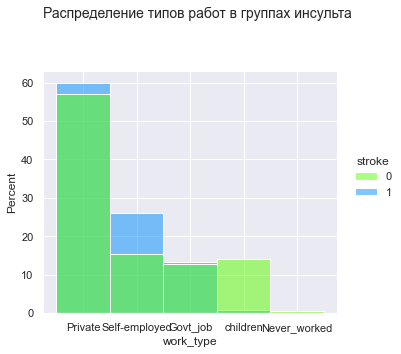

In [128]:
import seaborn as sns
sns.set(font = 'Arial')
ax=sns.displot(data=df, x='work_type', stat='percent', hue='stroke', palette="gist_rainbow", common_norm=False) #поиграемся с цветами
ax.fig.subplots_adjust (top= .8 ) #двигаем название выше
ax.fig.suptitle("Распределение типов работ в группах инсульта",
                  fontsize=14, fontdict={"weight": "bold"})

**Видно, что доли в группе самозанятых и работы с детьми различаются. Возможно, эти признаки влияют на наличие инсульта**

Text(0.5, 0.98, 'Распределение типов проживания в группах инсульта')

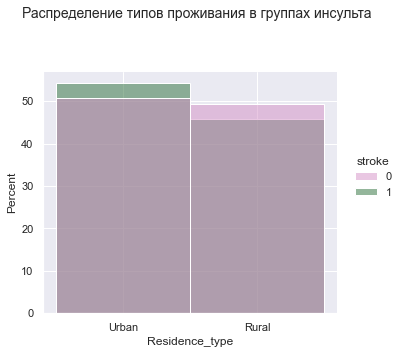

In [174]:
sns.set(font = 'Arial')
ax=sns.displot(data=df, x='Residence_type', stat='percent', hue='stroke', palette="cubehelix_r", common_norm=False) #поиграемся с цветами
ax.fig.subplots_adjust (top= .8 ) #двигаем название выше
ax.fig.suptitle("Распределение типов проживания в группах инсульта",
                  fontsize=14, fontdict={"weight": "bold"})

**А здесь видим, что доли по типу проживания слабо различаются. Однако, возможно все же там есть статистическая значимость**

Text(0.5, 0.98, 'Распределение cтатуса курения в группах инсульта')

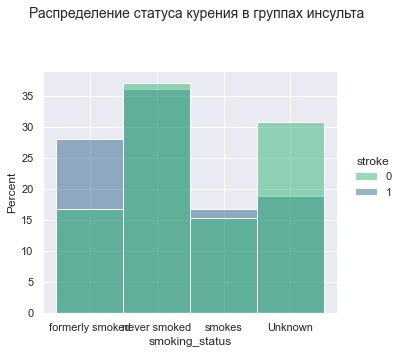

In [181]:
sns.set(font = 'Arial')
ax=sns.displot(data=df, x='smoking_status', stat='percent', hue='stroke', palette="viridis_r", common_norm=False) #поиграемся с цветами
ax.fig.subplots_adjust (top= .8 ) #двигаем название выше
ax.fig.suptitle("Распределение cтатуса курения в группах инсульта",
                  fontsize=14, fontdict={"weight": "bold"})

**А вот тут уже видим, что тех кто ранее курил больше в группе с инсультом, нежели в группе без инсульта. Скорее всего эти параметры зависимы**

Text(0.5, 1.0, 'Срадние уровни глюкозы в группах по возрасту и группе ИМТ')

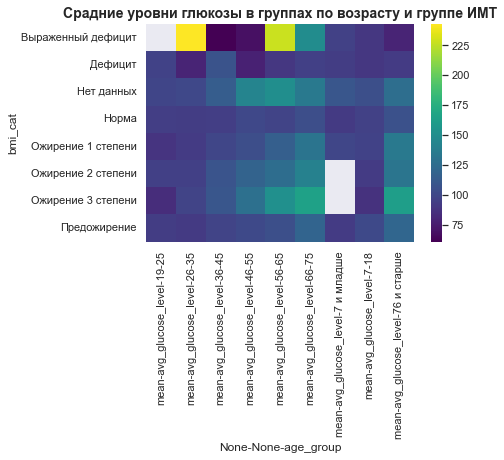

In [166]:
pivot=pd.pivot_table(df, ##делаем сводную таблицу - разрезы по группе ИМТ и возраста со средними по уровню глюкозы
               index=["bmi_cat", "age_group"],
               values=["avg_glucose_level"],
               aggfunc=[np.mean]).unstack() 
ax=sns.heatmap(pivot, cmap="viridis")
ax.set_title('Срадние уровни глюкозы в группах по возрасту и группе ИМТ',fontsize=14, fontdict={"weight": "bold"})

**Видим, что в группах более возрастных (от 46 лет) и людей с ожирением более высокий уровень глюкозы. Об этом говорят более светлые участки карты. Слишком светлые в верхней строке - скорее всего выбросы из-за маленького количества наблюдейний в этих группах. Соответственно, у нас уже есть понимание о связи этих данных**

**В предверии перехода к этапу корреляций, попробуем построить график корреляций для нашей целевой переменной - stroke**

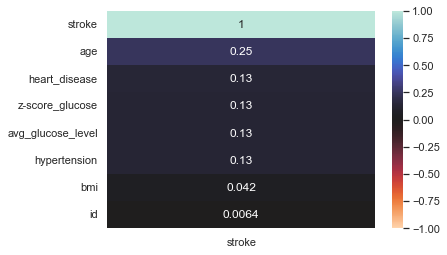

In [172]:
heatmap = sns.heatmap(df.corr()[['stroke']].sort_values(by='stroke', ascending=False), vmin=-1, vmax=1, annot=True, cmap='icefire_r')


**Итак, уже на этом этапе видно, что есть слабая зависимость между возрастом и наличием инсульта, так как есть положительный коэффициент > 0.2. Соответственно, чем старше человек, тем выше вероятность инсульта.  Давайте теперь будем смотреть на цифры. Предлагаю сразу построить все корреляции по нашим интервальным и бинарным переменным, чтобы посмотреть где есть связь. Но нужно не забыть убрать пропуски по переменной BMI**

In [222]:
df_corr=df.dropna() #можем воспользоваться этой функцией так как только по bmi есть пропуски
df_corr.info() #проверяем, что осталось 4909 наблюдений по всем переменным

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
 12  bmi_cat            4909 non-null   object 
 13  age_group          4909 non-null   object 
 14  z-score_glucose    4909 non-null   float64
dtypes: float64(4), int64(4), object(7)
memory usage: 613.6+ KB


**Мы также можем превратить категориальную переменную пола в бинарную. Одним наблюдением Other можем принебречь**

In [227]:
sex = {"gender":     {"Male": 0, "Female": 1}} #словарь замен
df_corr = df_corr.replace(sex) #меняем
df_corr = df_corr.loc[df_corr['gender'] != 'Other'] #удаляем лишнее
df_corr['gender'] = pd.to_numeric(df_corr['gender']) #делаем числовым
df_corr.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4908 non-null   int64  
 1   gender             4908 non-null   int64  
 2   age                4908 non-null   float64
 3   hypertension       4908 non-null   int64  
 4   heart_disease      4908 non-null   int64  
 5   ever_married       4908 non-null   object 
 6   work_type          4908 non-null   object 
 7   Residence_type     4908 non-null   object 
 8   avg_glucose_level  4908 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     4908 non-null   object 
 11  stroke             4908 non-null   int64  
 12  bmi_cat            4908 non-null   object 
 13  age_group          4908 non-null   object 
 14  z-score_glucose    4908 non-null   float64
dtypes: float64(4), int64(5), object(6)
memory usage: 613.5+ KB


In [229]:
df_corr1 = df_corr.drop(['id', 'ever_married', 'work_type', 
                         'Residence_type', 'smoking_status', 'bmi_cat', 'age_group', 
                         'z-score_glucose'], axis='columns') #убираем лишние переменные
df_corr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   int64  
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   avg_glucose_level  4908 non-null   float64
 5   bmi                4908 non-null   float64
 6   stroke             4908 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 306.8 KB


In [230]:
corr = df_corr1.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False) #считаем корреляции и сортируем коэфф. по убыванию

gender             gender               1.000000
age                age                  1.000000
bmi                bmi                  1.000000
avg_glucose_level  avg_glucose_level    1.000000
hypertension       hypertension         1.000000
heart_disease      heart_disease        1.000000
stroke             stroke               1.000000
bmi                age                  0.333314
age                bmi                  0.333314
hypertension       age                  0.274395
age                hypertension         0.274395
                   heart_disease        0.257104
heart_disease      age                  0.257104
avg_glucose_level  age                  0.236000
age                avg_glucose_level    0.236000
                   stroke               0.232313
stroke             age                  0.232313
avg_glucose_level  hypertension         0.180614
hypertension       avg_glucose_level    0.180614
bmi                avg_glucose_level    0.175672
avg_glucose_level  b

**Итак, видим что у нас нет коэф. больше 0.33, что говорит нам о слабых связях между переменными. Будем считать что корреляции с коэф. больше 0.3 говорят нам о средней связи между данными. А корреляции больше 0.2 - о слабой. Соответственно у нас есть 1 пара со средней связью - возраст и ИМТ, и 4 пары со слабой. Что интересно, целевая переменная инсульта попала только в 1 пару, что говорит о том, что нет прямой зависимости между какой-то переменной (возраст) и наличием инсульта, и в дальнейшем нам нужно будет использовать комплексные методы, чтобы найти эти зависимости.**

**Итого имеем следующие пары:**

**Возраст - имт: средняя связь**

**Возраст - гипертензия: слабая связь**

**Возраст - проблемы с сердцем: слабая связь**

**Возраст - средний уровень глюкозы: слабая связь**

**Возраст - инсульт: слабая связь**

**Все коэффициенты положительны, то есть связь однонаправлена - чем больше одна переменная, тем больше другая**



**Вспоминаем, что у нас есть выбросы по переменным ИМТ и уровню глюкозы. Попробуем перестроить на чистых данных пары со значимыми коэфф.**

In [236]:
mean = df_corr1['avg_glucose_level'].mean() 
std = df_corr1['avg_glucose_level'].std()
std_outlier_threshold_bottom = mean - 2.5 * std ##определяем нижнюю и верхнюю границу
std_outlier_threshold_up = mean + 2.5 * std
df_no_gl_out = df_corr1[df_corr1['avg_glucose_level'] < std_outlier_threshold_up]
df_no_gl_out.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4676 entries, 2 to 5109
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4676 non-null   int64  
 1   age                4676 non-null   float64
 2   hypertension       4676 non-null   int64  
 3   heart_disease      4676 non-null   int64  
 4   avg_glucose_level  4676 non-null   float64
 5   bmi                4676 non-null   float64
 6   stroke             4676 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 292.2 KB


In [238]:
df_no_gl_out['avg_glucose_level'].corr(df_no_gl_out['age'])

0.15268698223852892

**Получили, что коэф. снизился. Соответственно мы потеряли значимые данные, и зря убрали выбросы**

In [239]:
mean = df_corr1['bmi'].mean() 
std = df_corr1['bmi'].std()
std_outlier_threshold_bottom = mean - 2.5 * std ##определяем нижнюю и верхнюю границу
std_outlier_threshold_up = mean + 2.5 * std
df_no_bmi_out = df_corr1[df_corr1['bmi'] < std_outlier_threshold_up]
df_no_bmi_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4812 entries, 0 to 5109
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4812 non-null   int64  
 1   age                4812 non-null   float64
 2   hypertension       4812 non-null   int64  
 3   heart_disease      4812 non-null   int64  
 4   avg_glucose_level  4812 non-null   float64
 5   bmi                4812 non-null   float64
 6   stroke             4812 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 300.8 KB


In [240]:
df_no_gl_out['bmi'].corr(df_no_gl_out['age'])

0.33226247222251004

**То же самое здесь - соответственно выбросы нам не мешают, а наоборот дают более полную картину.**

**Визуализируем данные**

<AxesSubplot:xlabel='bmi', ylabel='age'>

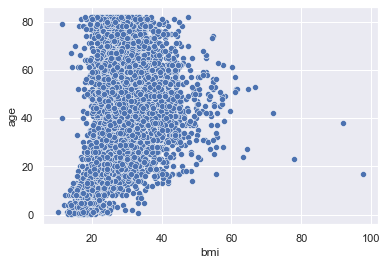

In [233]:
sns.scatterplot(
    x='bmi', 
    y='age', 
    data=df_corr1)

<AxesSubplot:xlabel='hypertension', ylabel='age'>

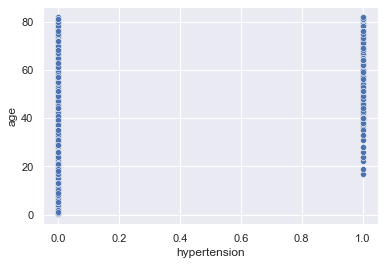

In [241]:
sns.scatterplot(
    x='hypertension', 
    y='age', 
    data=df_corr1)

<AxesSubplot:xlabel='heart_disease', ylabel='age'>

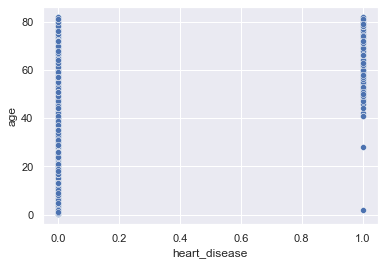

In [242]:
sns.scatterplot(
    x='heart_disease', 
    y='age', 
    data=df_corr1)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='age'>

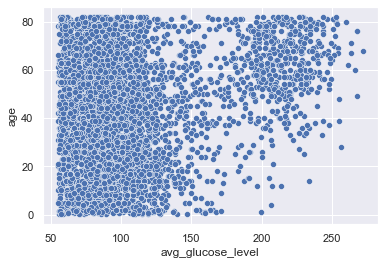

In [243]:
sns.scatterplot(
    x='avg_glucose_level', 
    y='age', 
    data=df_corr1)

<AxesSubplot:xlabel='stroke', ylabel='age'>

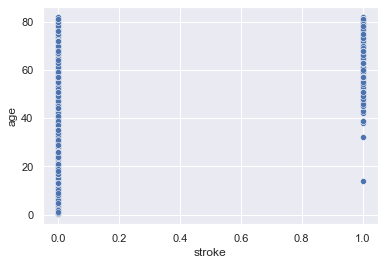

In [244]:
sns.scatterplot(
    x='stroke', 
    y='age', 
    data=df_corr1)

**Графики с бинарными переменными не самые интерпретируемые, однако мы видим пропуски в 1 в нижней части, то есть в молодом возрасте, что как раз и показывает нам потенциал для найденных связей. Основной вывод отсюда - возраст увеличивает в целом все остальные исследуемые в этом блоке переменные (кроме очевидно пола).**